In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Membaca dataset
df = pd.read_csv('sherina.csv', delimiter=';')
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat Sep 30 22:57:05 +0000 2023,1708254670446362636,Aku nemu promo menarik di Lazada nih. Yuk coba...,0,0,1,1,in,1682304793153523712,1708254670446362636,tokomawaddah10,https://twitter.com/tokomawaddah10/status/1708...
1,Sat Sep 30 19:22:12 +0000 2023,1708200590290166052,"Ngeditnya mewek.. merinding 😭💕 What if..?"" @...",34,9,178,413,in,900013274002989057,1708200590290166052,thepan_316,https://twitter.com/thepan_316/status/17082005...
2,Sat Sep 30 18:22:49 +0000 2023,1708185645510996447,When you gabut malem-malem dan akhirnya bikin ...,0,0,0,1,in,716908349040697344,1708185645510996447,_erenef,https://twitter.com/_erenef/status/17081856455...
3,Sat Sep 30 18:01:28 +0000 2023,1708180276311122248,Terimakasih film #PetualanganSherina2 sudah me...,0,0,0,0,in,775314549876502528,1708180276311122248,Fgmina29,https://twitter.com/Fgmina29/status/1708180276...
4,Sat Sep 30 17:57:00 +0000 2023,1708179151650542059,Terimakasih banyak #PetualanganSherina2 sepert...,0,0,0,0,in,775314549876502528,1708179151650542059,Fgmina29,https://twitter.com/Fgmina29/status/1708179151...
...,...,...,...,...,...,...,...,...,...,...,...,...
637,Thu Sep 28 01:32:50 +0000 2023,1707206700829434333,Hei kamu yang kelahiran 2000! Gak kerasa ya ud...,0,0,0,0,in,1538740952465952768,1707206700829434333,zinema_id,https://twitter.com/zinema_id/status/170720670...
638,Thu Sep 28 01:23:54 +0000 2023,1707204452149862460,#PetualanganSherina2 ini edan ya. Tadi pagi pa...,0,1,0,0,in,40005447,1707204452149862460,ninoriano,https://twitter.com/ninoriano/status/170720445...
639,Thu Sep 28 01:00:17 +0000 2023,1707198507697000783,#PetualanganSherina2 gak sabar 🤤 https://t.co/...,0,0,0,0,in,1276859081987244035,1707198507697000783,lattenightt,https://twitter.com/lattenightt/status/1707198...
640,Thu Sep 28 00:56:37 +0000 2023,1707197587009528068,let's go... 23 tahun berlalu akhirnya kita bi...,0,0,0,0,in,1201634651296546816,1707197587009528068,Ramdhan_1810,https://twitter.com/Ramdhan_1810/status/170719...


In [ ]:
# Calculating the number of nodes (unique tweets)
num_nodes = df['username'].nunique()

# Calculating the number of edges
# Summing up all interactions for each tweet and then summing across all tweets
num_edges = df[['favorite_count', 'quote_count', 'reply_count', 'retweet_count']].sum().sum()
# Counting unique user accounts
num_accounts = df['user_id_str'].nunique()

num_nodes, num_edges, num_accounts

(464, 2552, 464)

In [ ]:
# Membuat graf
G = nx.Graph()

In [ ]:
# Membuat objek graph
G = nx.Graph()

# Tambah node berdasarkan kolom "username" dan "full_text"
for index, row in df.iterrows():
    username = row["username"]
    keyword = row["full_text"]
    G.add_node(username)
    G.add_node(keyword)
    G.add_edge(username, keyword)

In [ ]:
# Menghitung derajat setiap node dalam grafik (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Mengurutkan node berdasarkan degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Menampilkan 10 pengguna paling berpengaruh berdasarkan degree centrality
top_users = dict(sorted_degree_centrality[:10])  # Ambil 10 pengguna teratas
print("Top 10 influential users by Degree Centrality:")
for user, centrality in sorted_degree_centrality[:10]:
    print(f"User: {user}, Degree Centrality: {centrality}")

Top 10 influential users by Degree Centrality:
User: ath22wht, Degree Centrality: 0.013574660633484163
User: mimiooo, Degree Centrality: 0.00995475113122172
User: yan_widjaya, Degree Centrality: 0.007239819004524887
User: ddian_p, Degree Centrality: 0.007239819004524887
User: a_wisterian, Degree Centrality: 0.006334841628959276
User: Rull_Kaka, Degree Centrality: 0.006334841628959276
User: senorjoey, Degree Centrality: 0.006334841628959276
User: DIMAS_NAY, Degree Centrality: 0.005429864253393665
User: film_bioskop, Degree Centrality: 0.004524886877828055
User: tirza_elv, Degree Centrality: 0.004524886877828055


<ipython-input-20-11af2926fd74>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Degree Centrality')


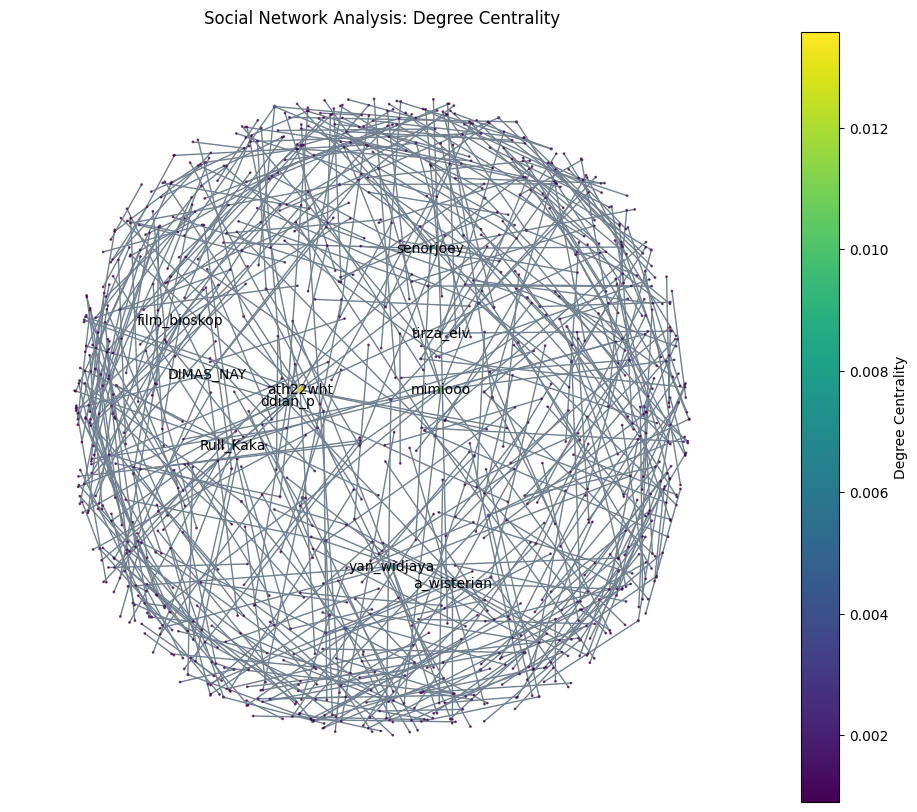

In [ ]:
# Visualisasi grafik jaringan
plt.figure(figsize=(12, 10))

# Menggambar network graph dengan menyesuaikan node lebih baik
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# Menggambar edge
nx.draw_networkx_edges(G, pos, width=1, edge_color="slategray")

# Menggambar node dengan ukuran dan warna sesuai derajat
node_color = [degree_centrality[node] for node in G.nodes()]
node_size = [v * 1000 for v in node_color]

# Menggambar node sebagai scatter plot
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.viridis, alpha=0.7)

# Menambahkan label pada node pengguna teratas
labels = {node: node if node in top_users else '' for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

# Menambahkan color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(min(node_color), max(node_color)))
sm._A = []  # Dummy untuk mencegah kesalahan
plt.colorbar(sm, label='Degree Centrality')

plt.title("Social Network Analysis: Degree Centrality")
plt.axis('off')
plt.show()